In [ ]:
!pip install noisereduce
import torch
import torch.nn as nn
import torch.optim as optim
import librosa
import librosa.display
import numpy as np
import os
import IPython.display as ipd
import noisereduce as nr

In [ ]:
device = None
dtype = torch.float32
if torch.cuda.is_available():
  device = torch.device('cuda')
else: device = torch.device('cpu')

In [ ]:
!git clone https://github.com/soerenab/AudioMNIST.git

Cloning into 'AudioMNIST'...
remote: Enumerating objects: 30119, done.
remote: Total 30119 (delta 0), reused 0 (delta 0), pack-reused 30119
Receiving objects: 100% (30119/30119), 944.54 MiB | 6.77 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Checking out files: 100% (30018/30018), done.


In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4185, done.
remote: Counting objects: 100% (513/513), done.
remote: Compressing objects: 100% (513/513), done.
remote: Total 4185 (delta 4), reused 501 (delta 0), pack-reused 3672
Receiving objects: 100% (4185/4185), 30.44 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
!pip install torchaudio
import torchaudio
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.9 MB 4.3 MB/s 


In [ ]:
audio = []
#dir = 'AudioMNIST/data/'
dir = 'free-spoken-digit-dataset/recordings'

for (root,dirs,files) in os.walk(dir):
  for file in files:
    if file.endswith('.wav'):
      path = root+'/'+file
      audio.append(path) #appends [data, sampling rate to audio]
      print(path)
    
      

free-spoken-digit-dataset/recordings/4_yweweler_35.wav
free-spoken-digit-dataset/recordings/1_yweweler_26.wav
free-spoken-digit-dataset/recordings/3_jackson_24.wav
free-spoken-digit-dataset/recordings/6_theo_48.wav
free-spoken-digit-dataset/recordings/0_nicolas_2.wav
free-spoken-digit-dataset/recordings/8_george_9.wav
free-spoken-digit-dataset/recordings/5_lucas_37.wav
free-spoken-digit-dataset/recordings/4_george_22.wav
free-spoken-digit-dataset/recordings/3_lucas_38.wav
free-spoken-digit-dataset/recordings/4_george_43.wav
free-spoken-digit-dataset/recordings/2_nicolas_29.wav
free-spoken-digit-dataset/recordings/9_nicolas_27.wav
free-spoken-digit-dataset/recordings/4_george_30.wav
free-spoken-digit-dataset/recordings/5_george_15.wav
free-spoken-digit-dataset/recordings/4_george_28.wav
free-spoken-digit-dataset/recordings/2_jackson_10.wav
free-spoken-digit-dataset/recordings/6_george_2.wav
free-spoken-digit-dataset/recordings/4_george_33.wav
free-spoken-digit-dataset/recordings/4_georg

In [ ]:
from tensorflow import keras

In [ ]:
#audio
#keras.utils.to_categorical

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sys
from matplotlib import cm

class DataGenerator:
  def __init__(self, dataset, max_len = 40):
    if dataset == "AudioMNIST":
      path = 'AudioMNIST/data/'
    elif dataset == 'freespeak': path = 'free-spoken-digit-dataset/recordings'
    self.path = path
    self.dataset = dataset;
    self.max_len = max_len
    print(path)

  def process_audio(self, file, root = None):
    '''
    returns audio's mfccs: 
    '''
    max_len = self.max_len;
    if root is None:
      path = os.path.join(self.path, file)
    else:
      path = os.path.join(root, file)
    wave, sr = librosa.load(path, mono=True, sr=None)
    #wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=8000)
    #chroma_stft = librosa.feature.chroma_stft(wave, sr=8000)
    
    pad_width = max_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    #pad_width_chroma_stft = max_len - chroma_stft.shape[1]
    #chroma_stft = np.pad(chroma_stft, pad_width=((0, 8), (0, pad_width_chroma_stft)), mode='constant')
    return mfcc
    #wave, sr = torchaudio.load_wav(path)
    # shifting to pytorch
    # mel = torchaudio.transform.MelSpectrogram(wave, )
    # pad_width = max_len - mel.shape[1]
    # mel_padded = 

    # return mel_padded

  def __get_data(self):
    '''returns audio files after extracting mfc features and categorical labels'''
    label = []
    data = []
    dir = self.path
    i=0
    
    for (root,dirs,files) in os.walk(dir):
      for file in files:
        i+=1
        if file.endswith('.wav'):
          data.append(self.process_audio(file, root = root))
          
          label.append(file.split('_')[0][0])
          sys.stdout.write("\rDoing thing %i" % i)
          sys.stdout.flush()
    return np.asarray(data), keras.utils.to_categorical(label)

  def get_data(self, test_size = 0.1, val_size = 0.1):
    data, labels = self.__get_data()
    X, X_test, y, y_test = train_test_split(data, labels, test_size=test_size, random_state = 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state = 2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
dataset = DataGenerator('AudioMNIST',100) 

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_data(test_size = 0.1, val_size = 0.111)

AudioMNIST/data/
Doing thing 30001

In [ ]:
import pickle

In [ ]:
X_train.shape

(24003, 20, 100)

In [ ]:

data = {
    'X_train': X_train, 'y_train': y_train,
    'X_test': X_test, 'y_test':y_test,
    'X_val': X_val, 'y_val': y_val
}
#for key in data.keys():
#  mat = data[key]
#  pickle.dump( mat, open( "Data/"+key+".pkl", "wb" ) )

In [ ]:
#new_data = pickle.load(open('Data/X_train.pkl', 'rb'))
#new_data = np.reshape(new_data, (2000, 20, 20))
#assert (new_data == X_train).all()

In [ ]:
#For loading data from colab
'''
import pickle
data={}
keys = 'X_train, X_val, X_test, y_train, y_val, y_test'.split(', ')
for key in keys:
  path = '/content/drive/MyDrive/Stride/Data/' #"Data/"
  mat = pickle.load( open( path +key+".pkl", "rb" ) )
  data.update({key : mat} )

X_train, X_val, X_test, y_train, y_val, y_test = [y for y in data.values()]
'''


'\nimport pickle\ndata={}\nkeys = \'X_train, X_val, X_test, y_train, y_val, y_test\'.split(\', \')\nfor key in keys:\n  path = \'/content/drive/MyDrive/Stride/Data/\' #"Data/"\n  mat = pickle.load( open( path +key+".pkl", "rb" ) )\n  data.update({key : mat} )\n\nX_train, X_val, X_test, y_train, y_val, y_test = [y for y in data.values()]\n'

In [ ]:
#import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU

#from ann_visualizer.visualize import ann_viz

def get_cnn_model(input_shape, num_classes, d = 0.3):
  model = Sequential()
  #model.add(Input(shape= (20,20,1) ))
  #conv
  model.add(Conv2D(32, kernel_size=3,  input_shape = input_shape)) #18
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(64, kernel_size=3,strides = 2)) #16
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #pool
  model.add(Conv2D(32, kernel_size=2, strides = 2)) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(64, kernel_size=5, padding = 'same',strides = 2)) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(128, kernel_size=3, padding = 'same')) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #pool
  model.add(Conv2D(128, kernel_size=2, strides = 2, activation='relu')) #2
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))

  model.add(Flatten())
  #2 x FC
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  model.add(Dense(100))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  model.add(Dense(num_classes, activation='softmax'))

  #model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
  return model


In [ ]:
#model params and minor reshaping
dim = X_train.shape[1]
assert dim == 20
channels =1
X_train = X_train.reshape((X_train.shape[0], dim, 40, channels))
X_val = X_val.reshape((X_val.shape[0], dim, 40, channels))
X_test = X_test.reshape((X_test.shape[0], dim, 40, channels))
input_shape = (dim, 40, 1)
classes = 10

ValueError: ignored

In [ ]:
X_train.shape

(24003, 20, 100, 1)

In [ ]:
#import keras
#from keras.optimizers import Adam
!nvidia-smi
#model = keras.models.load_model('/content/drive/MyDrive/Stride/final_model')

Wed Aug 25 10:19:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    61W / 149W |   1281MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = get_cnn_model(input_shape, classes) #, 0.4
opt = keras.optimizers.Adam(learning_rate=1e-3)#, decay = 0.95)
# model.compile(optimizer=opt,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=10, 
                    validation_data=(X_val, y_val), verbose = 1)

Epoch 1/10
376/376 [==============================] - 12s 26ms/step - loss: 1.3775 - accuracy: 0.5407 - val_loss: 0.2090 - val_accuracy: 0.9356
Epoch 2/10
376/376 [==============================] - 9s 25ms/step - loss: 0.3363 - accuracy: 0.8974 - val_loss: 0.0952 - val_accuracy: 0.9683
Epoch 3/10
376/376 [==============================] - 9s 25ms/step - loss: 0.2100 - accuracy: 0.9368 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 4/10
376/376 [==============================] - 9s 24ms/step - loss: 0.1652 - accuracy: 0.9491 - val_loss: 0.0650 - val_accuracy: 0.9770
Epoch 5/10
376/376 [==============================] - 9s 24ms/step - loss: 0.1386 - accuracy: 0.9563 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 6/10
376/376 [==============================] - 9s 24ms/step - loss: 0.1190 - accuracy: 0.9633 - val_loss: 0.0241 - val_accuracy: 0.9923
Epoch 7/10
376/376 [==============================] - 9s 24ms/step - loss: 0.1238 - accuracy: 0.9614 - val_loss: 0.0320 - val_accuracy: 0.990

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 18, 98, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 18, 98, 32)        128       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 18, 98, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 18, 98, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 48, 64)         18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 48, 64)         256       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 8, 48, 64)        

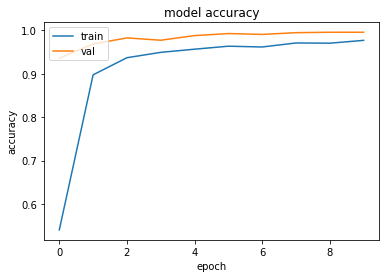

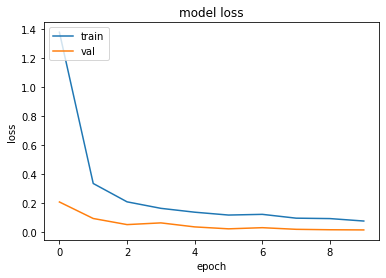

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

47/47 [==============================] - 1s 11ms/step - loss: 0.0120 - accuracy: 0.9960


[0.01204868033528328, 0.9959999918937683]

In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
#model.save('final_model')

In [ ]:
#!zip -r final_model.zip final_model
#from google.colab import files
#files.download("final_model.zip")

### Manual check on test set


In [ ]:
X_test[21].shape

(20, 40, 1)

In [ ]:
y_test[21]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
dd = []
dd.append(X_test[21])
nd = np.asarray(dd)
del dd

In [ ]:
nd.shape

(1, 20, 40, 1)

In [ ]:
model.predict(nd).argmax()

1

# Test on given file

In [ ]:
data, sr = librosa.load('/content/drive/MyDrive/Stride/VICTIM-AUDIO-ACUITY-TEST.mp3')
data = nr.reduce_noise(y=data, sr=sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


  0%|          | 0/8 [00:00<?, ?it/s]

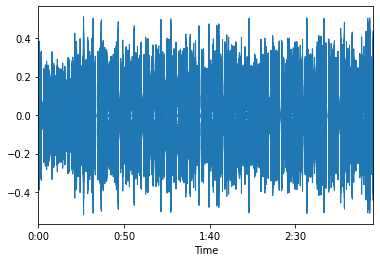

In [ ]:
librosa.display.waveplot(data)

In [ ]:
data.shape

(4309056,)

In [ ]:
file = '/content/drive/MyDrive/Stride/VICTIM-AUDIO-ACUITY-TEST.mp3'
audio, sr = torchaudio.load(file)

In [ ]:
audio.shape

torch.Size([1, 4308480])

In [ ]:
!pip install pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence

#def match_target_amplitude(aChunk, target_dBFS):
#   ''' Normalize given audio chunk '''
#    change_in_dBFS = target_dBFS - aChunk.dBFS
#    return aChunk.apply_gain(change_in_dBFS)

song = AudioSegment.from_mp3(file)

In [ ]:
song

In [ ]:
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 600,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -40
)

In [ ]:
len(chunks)

116

In [ ]:
#chunks[1].export("filename.wav", format="wav") #to save as mp3/mp4

In [ ]:
chunks[1]

In [ ]:
#for i in range(len(chunks)):
 #chunks[i].export(f"new_data/{i}.wav", format="wav")



In [ ]:
# saving after filtering data

p=0
chunks1 = []
for i in range(len(chunks)):
  if chunks[i].duration_seconds < 1:
    chunks1.append(chunks[i])
    chunks[i].export(f"new_data1/{p}.wav", format="wav")
    p += 1
  #print(i,chunks[i].duration_seconds)

In [ ]:
len(chunks1)

81

In [ ]:
#!zip -r new_data1.zip new_data1
#from google.colab import files
#files.download("new_data1.zip")

In [ ]:
import sys
class DataGen :

  def __init__(self,dir,num,max_len = 40):
    self.dir = dir
    self.num = num
    self.max_len = 40
    print(dir,num,max_len)


  def process_aud(self,file_path):
    max_len = self.max_len
    wave, sr = librosa.load(file_path,mono=True,sr =None)
    #wave = wave[::3]
    wave = nr.reduce_noise(y=wave, sr=sr)

    
    mfcc = librosa.feature.mfcc(wave, sr=8000)

#    if mfcc.shape[1] > 80:
#      wave, sr = librosa.load(file_path,mono=True,sr =None)
#      wave = wave[::10]
#      mfcc = librosa.feature.mfcc(wave, sr=8000)

    if mfcc.shape[1] > 40:
      wave, sr = librosa.load(file_path,mono=True,sr =None)
      wave = wave[::3]
      mfcc = librosa.feature.mfcc(wave, sr=8000)

    
    pad_width = max_len - mfcc.shape[1]
    print(pad_width)
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    fig, ax = plt.subplots()
    mfcc_data= np.swapaxes(mfcc, 0 ,1)
    cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
    ax.set_title('MFCC')

    plt.show()
    librosa.display.waveplot(wave)
    return mfcc

  def __get_data(self):

    
    data = []
    
    for i in range(self.num):
      file_path = f'/content/{self.dir}/{i}.wav'
      data.append(self.process_aud(file_path))
      
      sys.stdout.write("\rDoing thing %i" % i)
      sys.stdout.flush()
      print(file_path)
    
    return np.asarray(data)

  def get_data(self):

    data = self.__get_data()
    
    return data

In [ ]:
dataset_new = DataGen('new_data1',len(chunks1),40)

new_data1 81 100


76


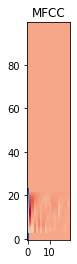

Doing thing 0/content/new_data1/0.wav
75


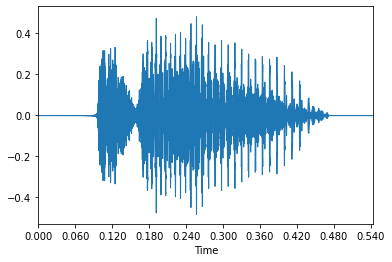

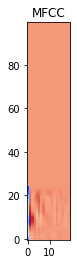

Doing thing 1/content/new_data1/1.wav
77


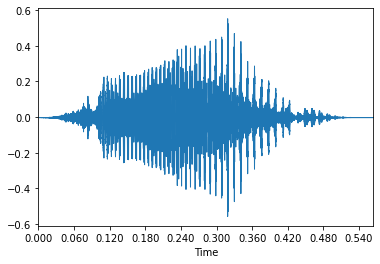

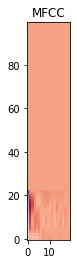

Doing thing 2/content/new_data1/2.wav
75


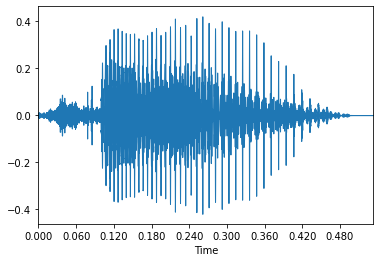

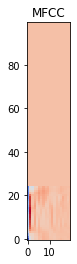

Doing thing 3/content/new_data1/3.wav
76


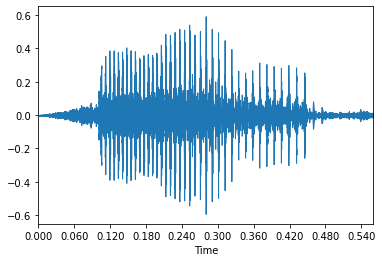

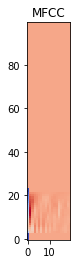

Doing thing 4/content/new_data1/4.wav
75


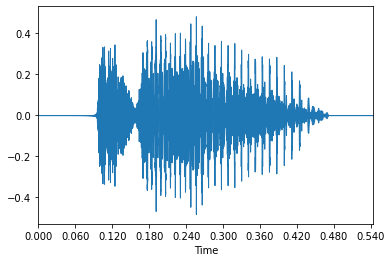

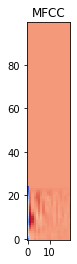

Doing thing 5/content/new_data1/5.wav
76


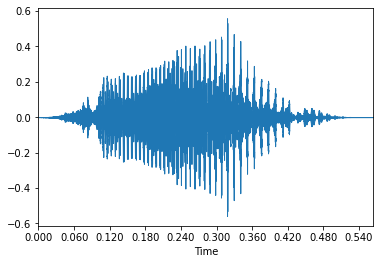

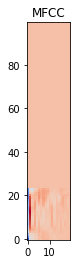

Doing thing 6/content/new_data1/6.wav
76


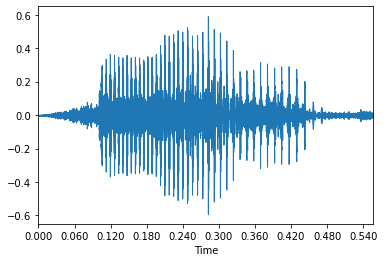

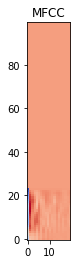

Doing thing 7/content/new_data1/7.wav
70


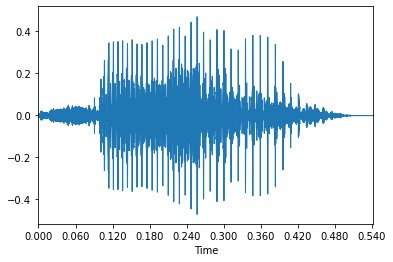

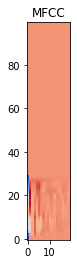

Doing thing 8/content/new_data1/8.wav
76


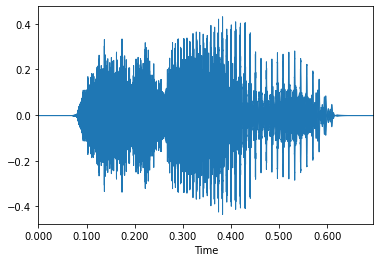

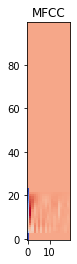

Doing thing 9/content/new_data1/9.wav
76


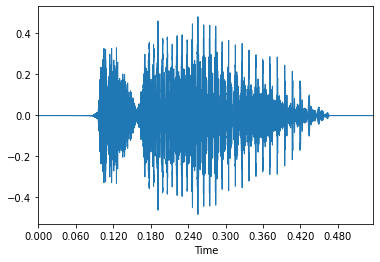

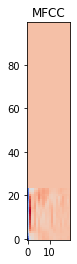

Doing thing 10/content/new_data1/10.wav
67


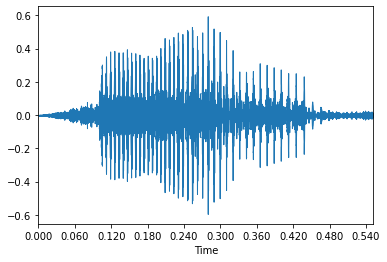

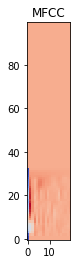

Doing thing 11/content/new_data1/11.wav
69


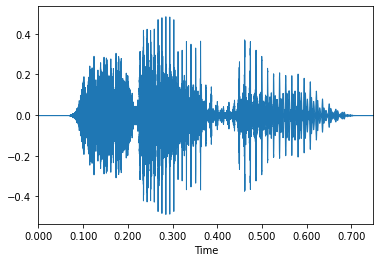

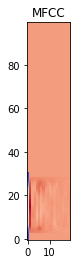

Doing thing 12/content/new_data1/12.wav
75


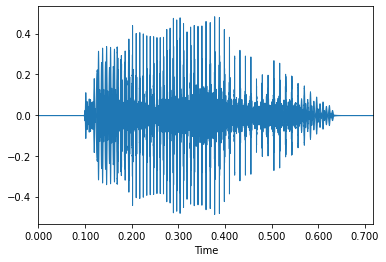

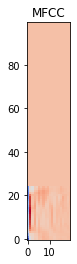

Doing thing 13/content/new_data1/13.wav
76


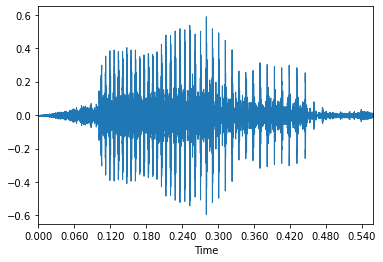

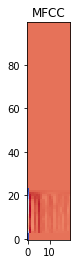

Doing thing 14/content/new_data1/14.wav
75


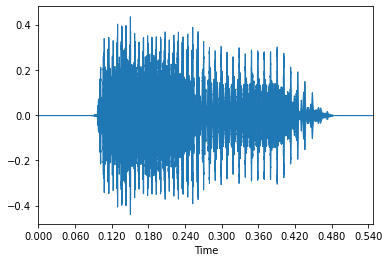

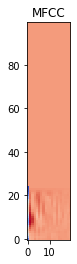

Doing thing 15/content/new_data1/15.wav
81


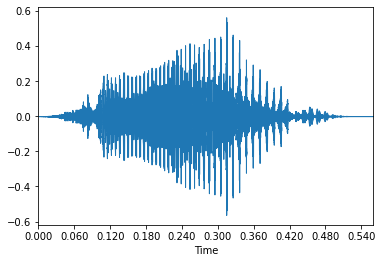

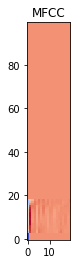

Doing thing 16/content/new_data1/16.wav
76


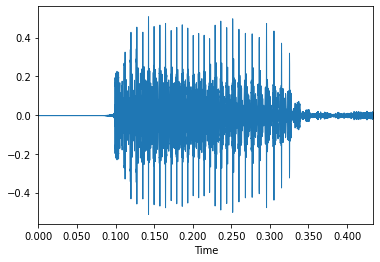

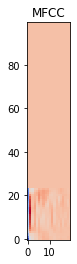

Doing thing 17/content/new_data1/17.wav
77


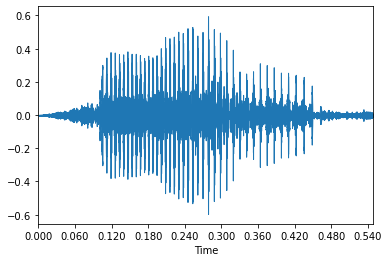

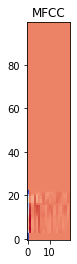

Doing thing 18/content/new_data1/18.wav
68


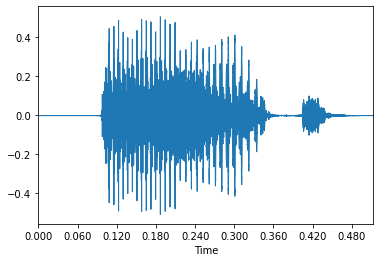

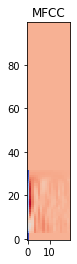

Doing thing 19/content/new_data1/19.wav
75


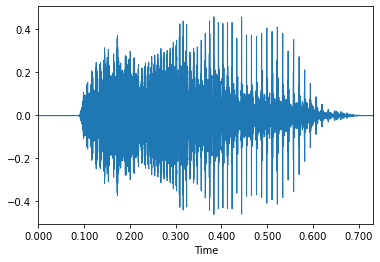

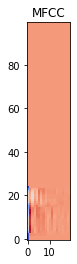

Doing thing 20/content/new_data1/20.wav
76


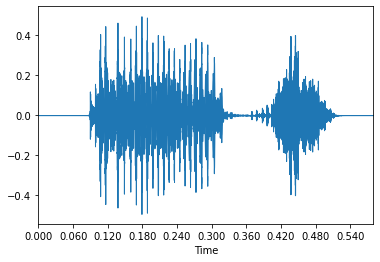

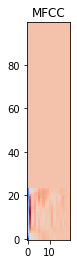

Doing thing 21/content/new_data1/21.wav
76


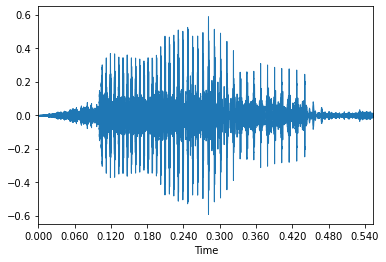

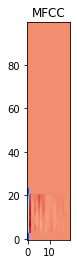

Doing thing 22/content/new_data1/22.wav
75


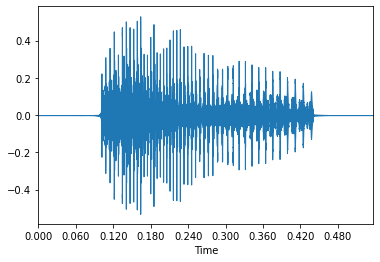

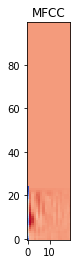

Doing thing 23/content/new_data1/23.wav
76


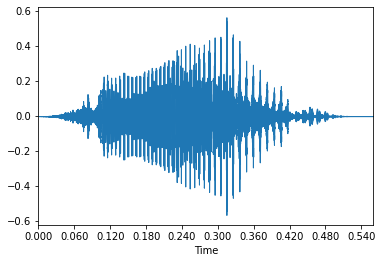

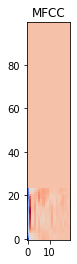

Doing thing 24/content/new_data1/24.wav
69


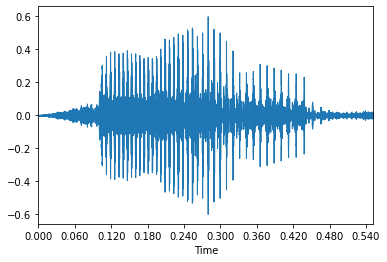

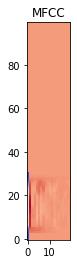

Doing thing 25/content/new_data1/25.wav
75


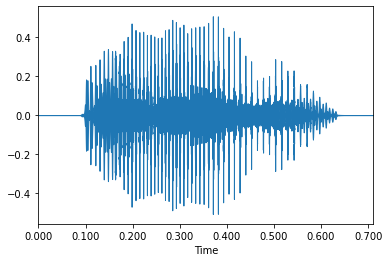

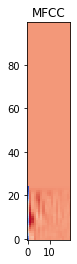

Doing thing 26/content/new_data1/26.wav
75


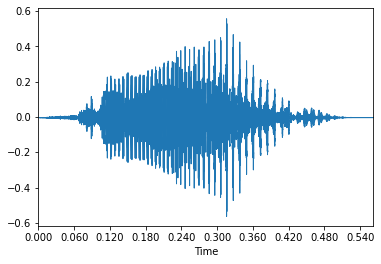

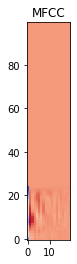

Doing thing 27/content/new_data1/27.wav
77


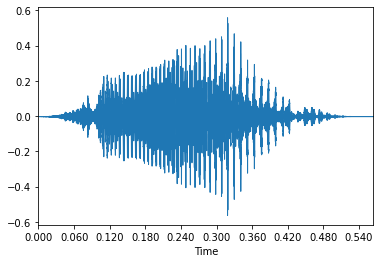

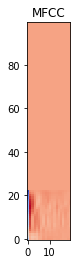

Doing thing 28/content/new_data1/28.wav
75


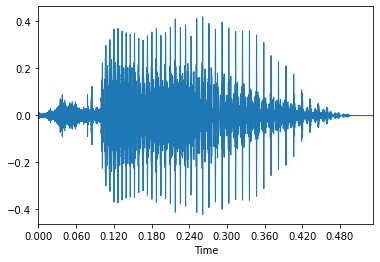

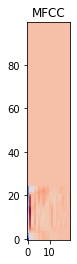

Doing thing 29/content/new_data1/29.wav
76


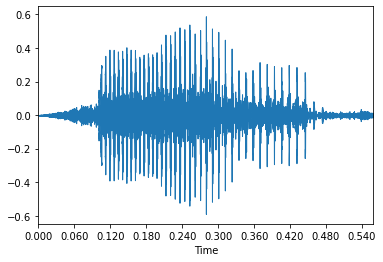

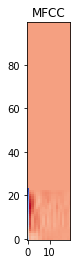

Doing thing 30/content/new_data1/30.wav
77


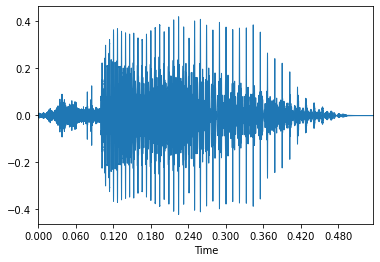

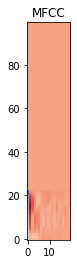

Doing thing 31/content/new_data1/31.wav
76


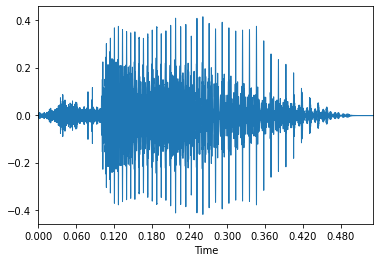

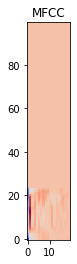

Doing thing 32/content/new_data1/32.wav
76


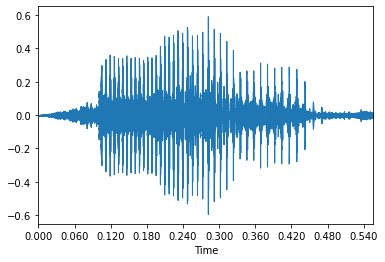

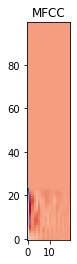

Doing thing 33/content/new_data1/33.wav
74


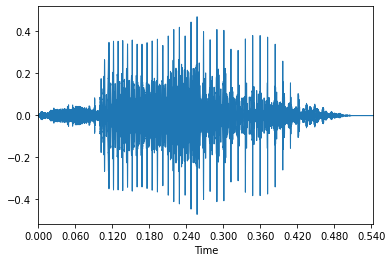

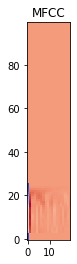

Doing thing 34/content/new_data1/34.wav
76


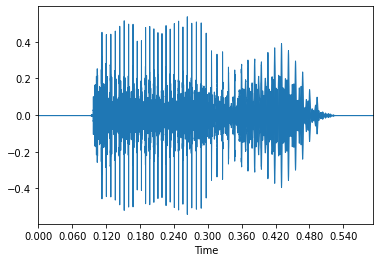

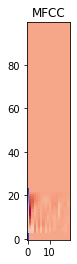

Doing thing 35/content/new_data1/35.wav
76


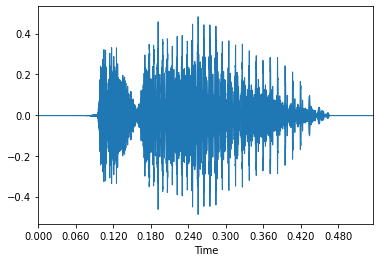

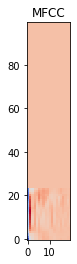

Doing thing 36/content/new_data1/36.wav
75


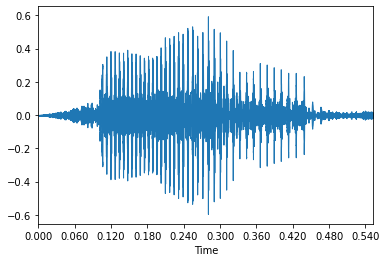

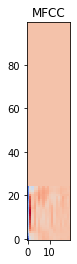

Doing thing 37/content/new_data1/37.wav
75


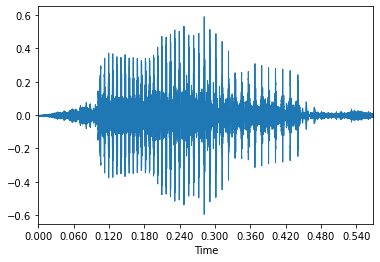

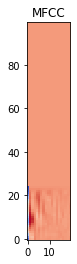

Doing thing 38/content/new_data1/38.wav
75


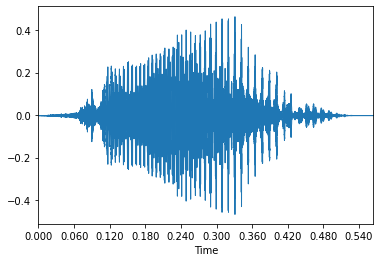

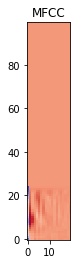

Doing thing 39/content/new_data1/39.wav
73


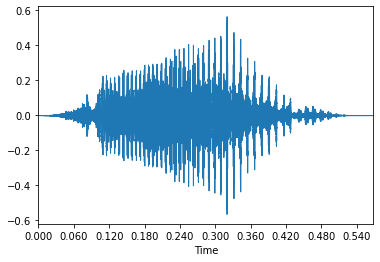

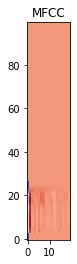

Doing thing 40/content/new_data1/40.wav
75


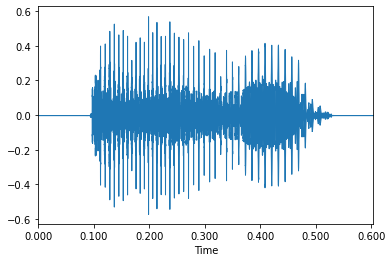

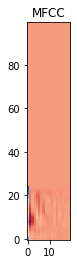

Doing thing 41/content/new_data1/41.wav
75


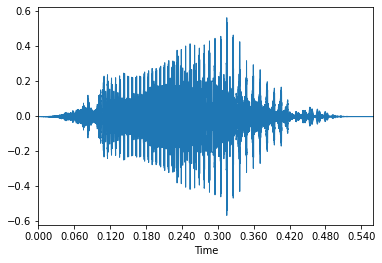

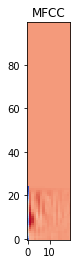

Doing thing 42/content/new_data1/42.wav
76


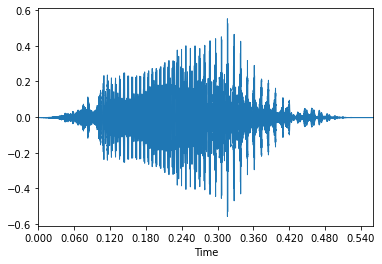

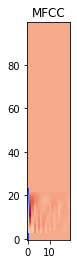

Doing thing 43/content/new_data1/43.wav
76


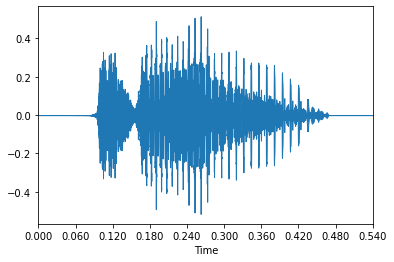

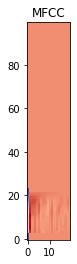

Doing thing 44/content/new_data1/44.wav
77


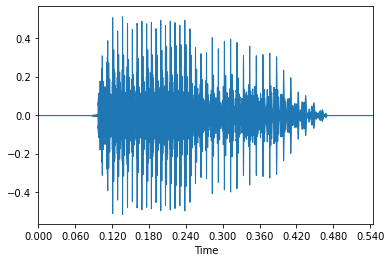

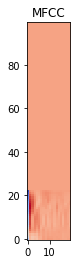

Doing thing 45/content/new_data1/45.wav
76


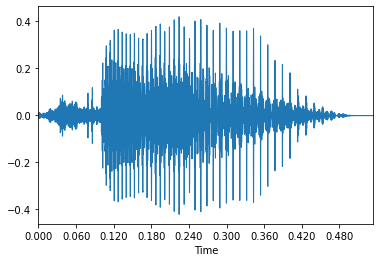

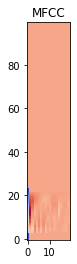

Doing thing 46/content/new_data1/46.wav
75


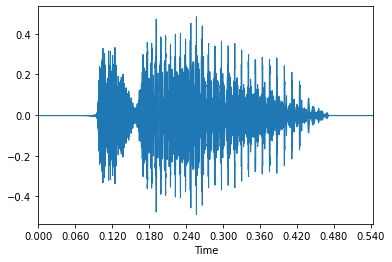

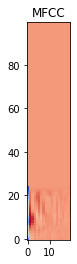

Doing thing 47/content/new_data1/47.wav
72


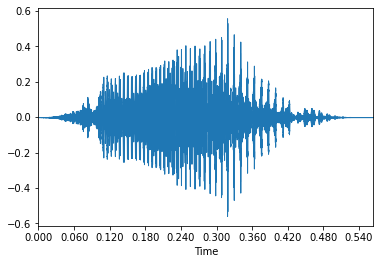

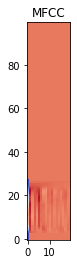

Doing thing 48/content/new_data1/48.wav
76


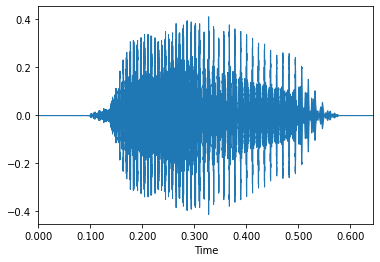

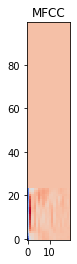

Doing thing 49/content/new_data1/49.wav
76


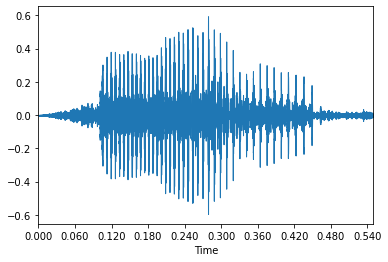

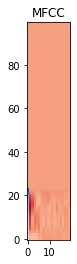

Doing thing 50/content/new_data1/50.wav
76


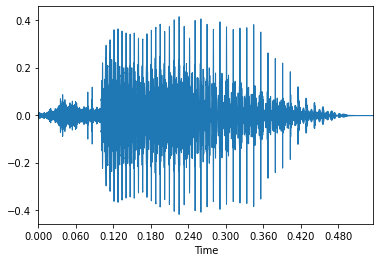

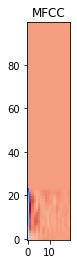

Doing thing 51/content/new_data1/51.wav
67


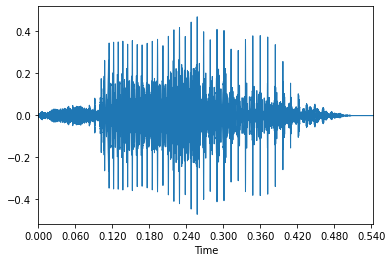

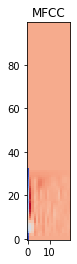

Doing thing 52/content/new_data1/52.wav
76


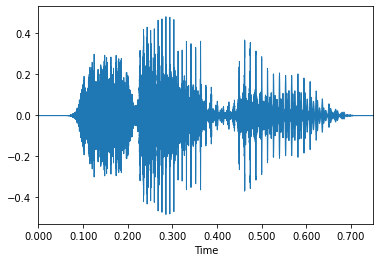

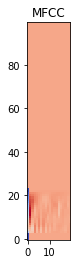

Doing thing 53/content/new_data1/53.wav
75


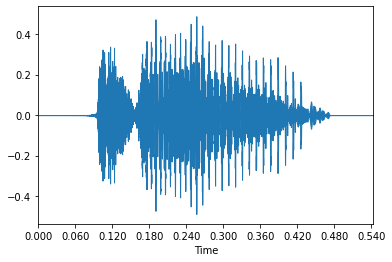

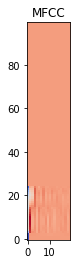

Doing thing 54/content/new_data1/54.wav
67


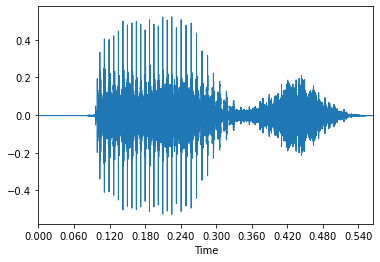

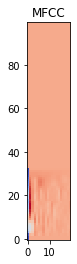

Doing thing 55/content/new_data1/55.wav
76


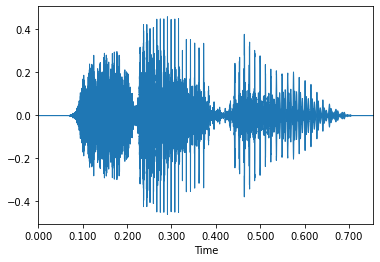

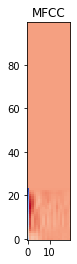

Doing thing 56/content/new_data1/56.wav
76


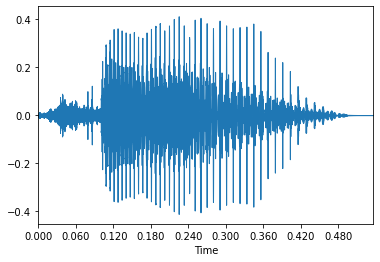

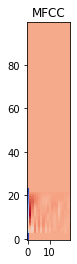

Doing thing 57/content/new_data1/57.wav
67


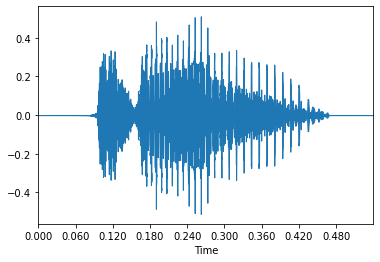

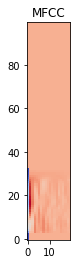

Doing thing 58/content/new_data1/58.wav
75


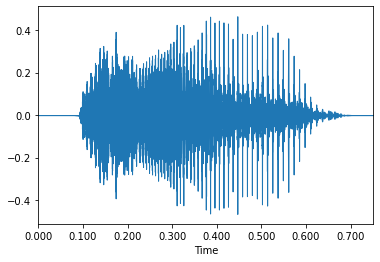

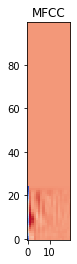

Doing thing 59/content/new_data1/59.wav
71


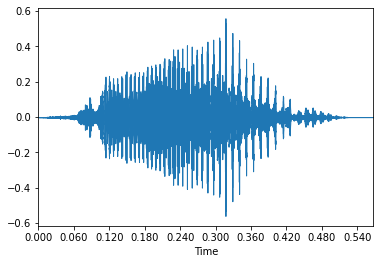

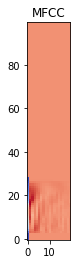

Doing thing 60/content/new_data1/60.wav
76


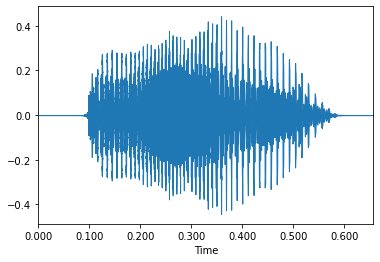

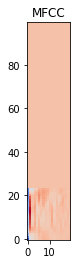

Doing thing 61/content/new_data1/61.wav
68


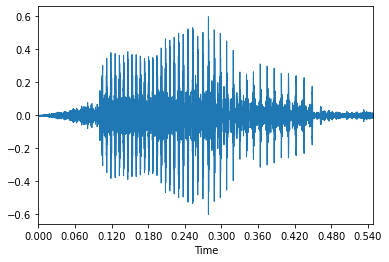

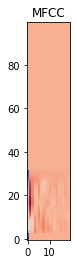

Doing thing 62/content/new_data1/62.wav
76


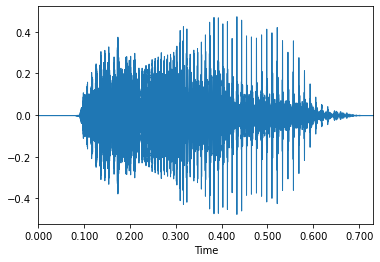

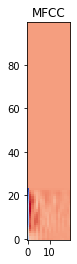

Doing thing 63/content/new_data1/63.wav
76


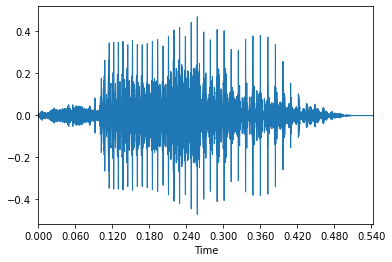

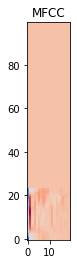

Doing thing 64/content/new_data1/64.wav
72


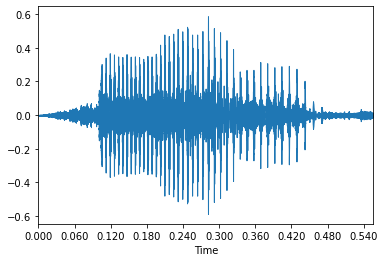

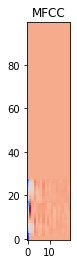

Doing thing 65/content/new_data1/65.wav
62


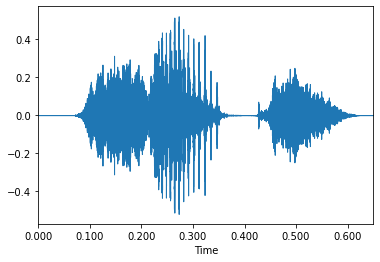

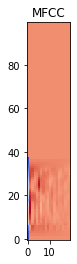

Doing thing 66/content/new_data1/66.wav
74


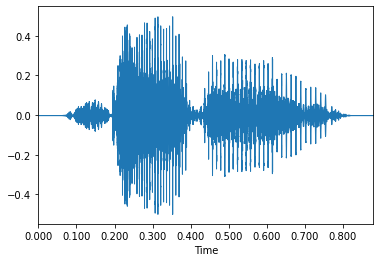

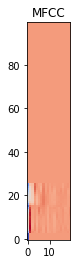

Doing thing 67/content/new_data1/67.wav
73


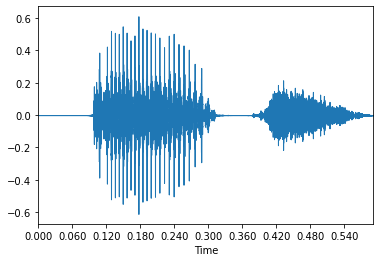

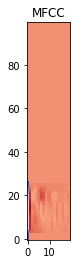

Doing thing 68/content/new_data1/68.wav
76


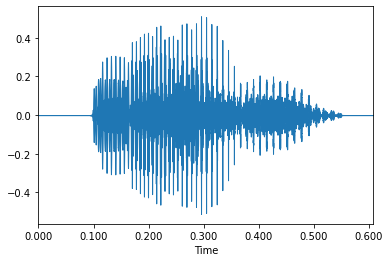

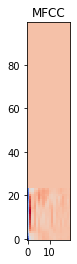

Doing thing 69/content/new_data1/69.wav
77


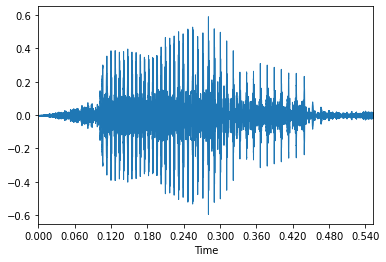

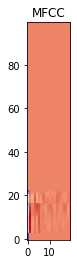

Doing thing 70/content/new_data1/70.wav
67


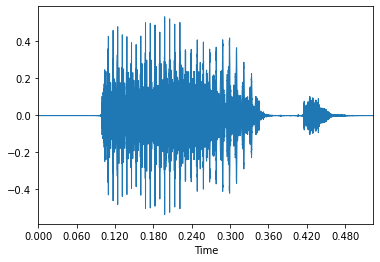

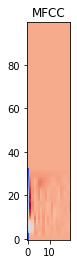

Doing thing 71/content/new_data1/71.wav
76


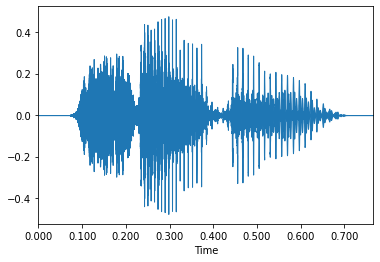

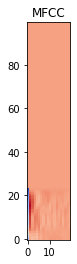

Doing thing 72/content/new_data1/72.wav
75


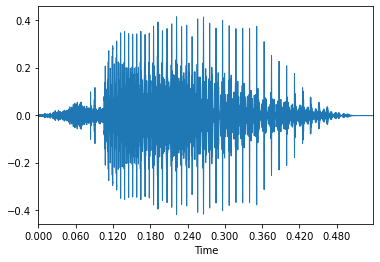

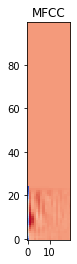

Doing thing 73/content/new_data1/73.wav
75


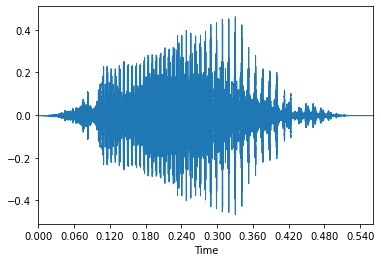

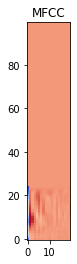

Doing thing 74/content/new_data1/74.wav
71


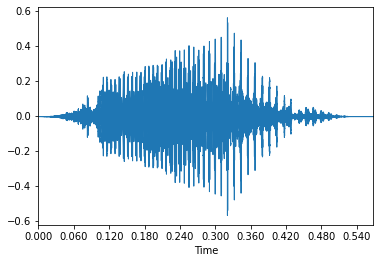

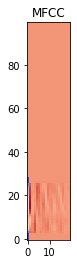

Doing thing 75/content/new_data1/75.wav
75


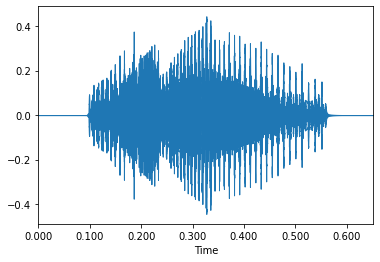

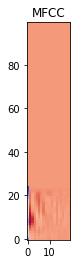

Doing thing 76/content/new_data1/76.wav
76


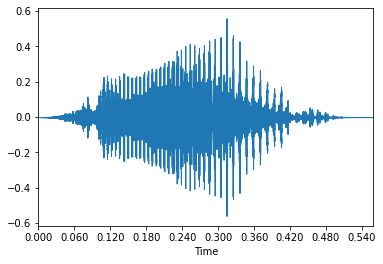

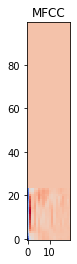

Doing thing 77/content/new_data1/77.wav
76


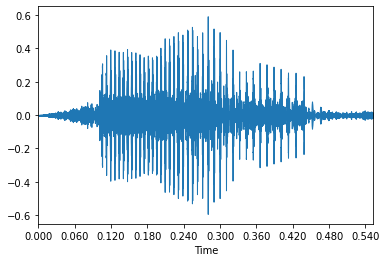

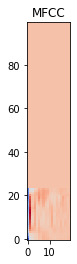

Doing thing 78/content/new_data1/78.wav
77


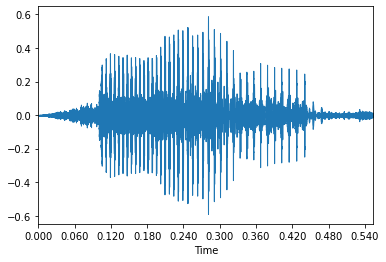

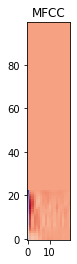

Doing thing 79/content/new_data1/79.wav
78


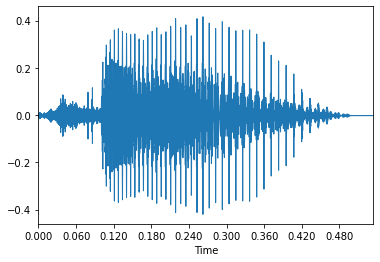

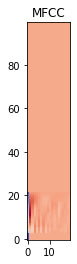

Doing thing 80/content/new_data1/80.wav


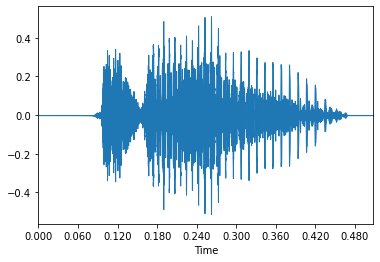

In [ ]:
data_audio = dataset_new.get_data()

In [ ]:
data_audio.shape

(81, 20, 100)

In [ ]:
data_audio = data_audio.reshape(data_audio.shape[0],data_audio.shape[1],data_audio.shape[2],1)

In [ ]:
final_test_preds = model.predict(data_audio)


In [ ]:
final_test_preds[23].argmax()

5

In [ ]:
chunks1[23]

In [ ]:
source = '/content/new_data1/13.wav'

#dat,srr = librosa.load('/content/AudioMNIST/data/02/1_02_0.wav')
dat,srr = librosa.load(source)
dat = nr.reduce_noise(y=dat, sr=srr)
#dat = dat[::1]
dat.shape


mfccX = librosa.feature.mfcc(dat, sr=8000)
mfccX.shape


#AudioSegment.from_wav('/content/AudioMNIST/data/02/1_02_0.wav')
AudioSegment.from_wav(source)

In [ ]:
pad_widthX = 40 - mfccX.shape[1]
mfccX = np.pad(mfccX, pad_width=((0, 0), (0, pad_widthX)), mode='constant')
mfccX.shape
mfccX = mfccX.reshape(mfccX.shape[0],mfccX.shape[1],1)
mfccX.shape


da = []
da.append(mfccX)
npd = np.asarray(da)
del da

In [ ]:
testp  = model.predict(npd)
testp.shape

(1, 10)

In [ ]:
testp.argmax()

4

In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

fatal: destination path 'free-spoken-digit-dataset' already exists and is not an empty directory.


In [ ]:
sou = '/content/free-spoken-digit-dataset/recordings/7_jackson_29.wav'
dataa,srrr = librosa.load(sou)
dataa = nr.reduce_noise(y=dataa, sr=srrr)



mfccXX = librosa.feature.mfcc(dataa, sr=8000)
mfccXX.shape


AudioSegment.from_wav(sou)

In [ ]:
pad_widthX = 40 - mfccXX.shape[1]
mfccXX = np.pad(mfccXX, pad_width=((0, 0), (0, pad_widthX)), mode='constant')
mfccXX.shape
mfccXX = mfccXX.reshape(mfccXX.shape[0],mfccXX.shape[1],1)
mfccXX.shape


da = []
da.append(mfccXX)
npd = np.asarray(da)
del da

In [ ]:
testp  = model.predict(npd)
testp.argmax()

2

In [ ]:
audio_new = []

dir = 'free-spoken-digit-dataset/recordings'

for (root,dirs,files) in os.walk(dir):
  for file in files:
    if file.endswith('.wav'):
      path = root+'/'+file
      audio_new.append(path) #appends [data, sampling rate to audio]
      print(path)

free-spoken-digit-dataset/recordings/4_yweweler_35.wav
free-spoken-digit-dataset/recordings/1_yweweler_26.wav
free-spoken-digit-dataset/recordings/3_jackson_24.wav
free-spoken-digit-dataset/recordings/6_theo_48.wav
free-spoken-digit-dataset/recordings/0_nicolas_2.wav
free-spoken-digit-dataset/recordings/8_george_9.wav
free-spoken-digit-dataset/recordings/5_lucas_37.wav
free-spoken-digit-dataset/recordings/4_george_22.wav
free-spoken-digit-dataset/recordings/3_lucas_38.wav
free-spoken-digit-dataset/recordings/4_george_43.wav
free-spoken-digit-dataset/recordings/2_nicolas_29.wav
free-spoken-digit-dataset/recordings/9_nicolas_27.wav
free-spoken-digit-dataset/recordings/4_george_30.wav
free-spoken-digit-dataset/recordings/5_george_15.wav
free-spoken-digit-dataset/recordings/4_george_28.wav
free-spoken-digit-dataset/recordings/2_jackson_10.wav
free-spoken-digit-dataset/recordings/6_george_2.wav
free-spoken-digit-dataset/recordings/4_george_33.wav
free-spoken-digit-dataset/recordings/4_georg

In [ ]:
test_data = []

for path_new in audio_new :

  wave, sr = librosa.load(path_new, mono=True, sr=None)
  #wave = wave[::3]
  wave = nr.reduce_noise(y=wave, sr=srrr)
  mfcc = librosa.feature.mfcc(wave, sr=8000)
  pad_width = 40 - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  mfcc = mfcc.reshape(mfcc.shape[0],mfcc.shape[1],1)
  test_data.append(mfcc)



/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1896
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1817
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1547
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1973
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2042
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1381
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa

In [ ]:
test = np.asarray(test_data)

In [ ]:
del test_data

In [ ]:
test.shape

(3000, 20, 40, 1)

In [ ]:
test_label =[]
for name in audio_new :
  test_label.append(name.split("/")[2].split('_')[0])


In [ ]:
test_label = np.asarray(test_label)

In [ ]:
test_label.shape

(3000,)

In [ ]:
test_preds = model.predict(test)

In [ ]:
c = []
for pred in test_preds :
  c.append(str(pred.argmax()))

   
  

In [ ]:
x=0
for cc,l in zip(c,test_label):
  if cc == l :
    x +=1

In [ ]:
import sklearn
print(x)

282


In [ ]:
test_label[0]

'3'

# STFT

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sys
from matplotlib import cm
import os

class DataGenerator:
  def __init__(self, dataset, max_len = 10000):
    if dataset == "AudioMNIST":
      path = 'AudioMNIST/data/'
    elif dataset == 'freespeak': path = 'free-spoken-digit-dataset/recordings'
    self.path = path
    self.dataset = dataset;
    self.max_len = max_len
    print(path)

  def process_audio(self, file, root = None):
    '''
    returns audio's mfccs: 
    '''
    max_len = self.max_len;
    if root is None:
      path = os.path.join(self.path, file)
    else:
      path = os.path.join(root, file)
    wave, sr = librosa.load(path, mono=True, sr=None)
    #wave = wave[::3]
    mfcc = librosa.feature.melspectrogram(y=wave, sr=sr)
    #chroma_stft = librosa.feature.chroma_stft(wave, sr=8000)
    
    pad_width = max_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    #pad_width_chroma_stft = max_len - chroma_stft.shape[1]
    #chroma_stft = np.pad(chroma_stft, pad_width=((0, 8), (0, pad_width_chroma_stft)), mode='constant')
    return mfcc
    #wave, sr = torchaudio.load_wav(path)
    # shifting to pytorch
    # mel = torchaudio.transform.MelSpectrogram(wave, )
    # pad_width = max_len - mel.shape[1]
    # mel_padded = 

    # return mel_padded

  def __get_data(self):
    '''returns audio files after extracting mfc features and categorical labels'''
    label = []
    data = []
    dir = self.path
    i=0
    
    for (root,dirs,files) in os.walk(dir):
      for file in files:
        i+=1
        if file.endswith('.wav'):
          data.append(self.process_audio(file, root = root))
          
          label.append(file.split('_')[0][0])
          sys.stdout.write("\rDoing thing %i" % i)
          sys.stdout.flush()
    return np.asarray(data), keras.utils.to_categorical(label)

  def get_data(self, test_size = 0.1, val_size = 0.1):
    data, labels = self.__get_data()
    X, X_test, y, y_test = train_test_split(data, labels, test_size=test_size, random_state = 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state = 2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
dataset = DataGenerator('freespeak') 

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_data(test_size = 0.4, val_size = 0.111)

NameError: ignored

In [ ]:
#model params and minor reshaping
dim = X_train.shape[1]
assert dim == 20
channels =1
X_train = X_train.reshape((X_train.shape[0], dim, 40, channels))
X_val = X_val.reshape((X_val.shape[0], dim, 40, channels))
X_test = X_test.reshape((X_test.shape[0], dim, 40, channels))
input_shape = (dim, 40, 1)
classes = 10

### Cos Similarity check

In [ ]:
source1 = '/content/new_data1/46.wav'
source2 = '/content/AudioMNIST/data/02/2_02_0.wav'
#dat,srr = librosa.load('/content/AudioMNIST/data/02/1_02_0.wav')
dat,srr = librosa.load(source)
dat2 ,srr2 = librosa.load(source2)
#dat = nr.reduce_noise(y=dat, sr=srr)
#dat = dat[::1]


mfcc = librosa.feature.mfcc(dat, sr=8000)
mfcc2 = librosa.feature.mfcc(dat2,sr = 8000)


#AudioSegment.from_wav('/content/AudioMNIST/data/02/1_02_0.wav')
AudioSegment.from_wav(source1)



In [ ]:
max_len = 40
pad_width1 = max_len - mfcc.shape[1]
pad_width2 = max_len - mfcc2.shape[1]
mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width1)), mode='constant')
mfcc2 = np.pad(mfcc2, pad_width=((0, 0), (0, pad_width2)), mode='constant')
mfcc = mfcc.reshape(1,-1)
mfcc2 = mfcc2.reshape(1,-1)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


print(cosine_similarity(mfcc, mfcc2))

[[0.7805299]]
